Titlu & context (Markdown)

# Compararea sesiunilor: AI vs NO-AI

În acest notebook analizăm și comparăm două sesiuni de interacțiune gestuală:

- **AI (Hailo ON)**: `session_ai.csv`
- **NO-AI (fără Hailo)**: `session_no_ai.csv`

Scopul este să evaluăm impactul filtrului AI (Hailo-8) asupra:
- performanței (FPS, latență),
- stabilității comenzilor,
- robusteții detecției,
- numărului de landmark-uri MediaPipe.


Import și încărcare CSV-uri

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

# Încarcă fișierele CSV
df_ai = pd.read_csv("session_ai.csv", parse_dates=["timestamp"])
df_noai = pd.read_csv("session_no_ai.csv", parse_dates=["timestamp"])

df_ai.head(), df_noai.head()


C:\Users\Marius\AppData\Local\Temp\ipykernel_24272\2611997457.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ai = pd.read_csv("session_ai.csv", parse_dates=["timestamp"])


(            timestamp        fps  frame_time_ms  hailo_score  hailo_valid  \
 0  1763921411.5065575   1.888082     529.638052          0.0            0   
 1  1763921412.0153456  24.294666      41.161299          0.0            0   
 2   1763921412.084312  24.662366      40.547609          0.0            0   
 3  1763921412.1414652  21.313170      46.919346          0.0            0   
 4  1763921412.1947386  22.597647      44.252396          0.0            0   
 
    mediapipe_points     command  tcp_sent  tcp_reconnected   cx   cy  
 0                21  Move Right         1                0  209  177  
 1                21  Move Right         0                0  208  177  
 2                21  Move Right         0                0  208  177  
 3                21  Move Right         0                0  208  177  
 4                21  Move Right         0                0  207  177  ,
                    timestamp         fps  frame_time_ms  hailo_score  \
 0 2025-11-23 21:28:48.5

Curățare + timp relativ

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)

# Celula 2 – citire simplă
df_ai = pd.read_csv("session_ai.csv")
df_noai = pd.read_csv("session_no_ai.csv")

# conversie explicită la datetime
df_ai["timestamp"] = pd.to_datetime(df_ai["timestamp"], errors="coerce")
df_noai["timestamp"] = pd.to_datetime(df_noai["timestamp"], errors="coerce")

print(df_ai.dtypes)
df_ai.head()


timestamp           datetime64[ns]
fps                        float64
frame_time_ms              float64
hailo_score                float64
hailo_valid                  int64
mediapipe_points             int64
command                     object
tcp_sent                     int64
tcp_reconnected              int64
cx                           int64
cy                           int64
dtype: object


C:\Users\Marius\AppData\Local\Temp\ipykernel_24272\1576902654.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ai["timestamp"] = pd.to_datetime(df_ai["timestamp"], errors="coerce")


,timestamp,fps,frame_time_ms,hailo_score,hailo_valid,mediapipe_points,command,tcp_sent,tcp_reconnected,cx,cy
0,NaT,1.888082,529.638052,0.0,0,21,Move Right,1,0,209,177
1,NaT,24.294666,41.161299,0.0,0,21,Move Right,0,0,208,177
2,NaT,24.662366,40.547609,0.0,0,21,Move Right,0,0,208,177
3,NaT,21.313170,46.919346,0.0,0,21,Move Right,0,0,208,177
4,NaT,22.597647,44.252396,0.0,0,21,Move Right,0,0,207,177


In [5]:
def add_relative_time(df):
    df = df.copy()
    # presupunem că acum timestamp e datetime64
    df["t_sec"] = (df["timestamp"] - df["timestamp"].iloc[0]).dt.total_seconds()
    return df

df_ai = add_relative_time(df_ai)
df_noai = add_relative_time(df_noai)

df_ai[["timestamp", "t_sec", "fps"]].head()


,timestamp,t_sec,fps
0,NaT,NaN,1.888082
1,NaT,NaN,24.294666
2,NaT,NaN,24.662366
3,NaT,NaN,21.313170
4,NaT,NaN,22.597647


Info de bază despre sesiuni

In [6]:
print("=== INFO SESIUNI ===")
print("AI session:")
print("  N frames:", len(df_ai))
print("  Durata (s):", df_ai["t_sec"].iloc[-1])

print("\nNO-AI session:")
print("  N frames:", len(df_noai))
print("  Durata (s):", df_noai["t_sec"].iloc[-1])


=== INFO SESIUNI ===
AI session:
  N frames: 8466
  Durata (s): nan

NO-AI session:
  N frames: 5367
  Durata (s): 339268.307394


FPS în timp (comparativ)

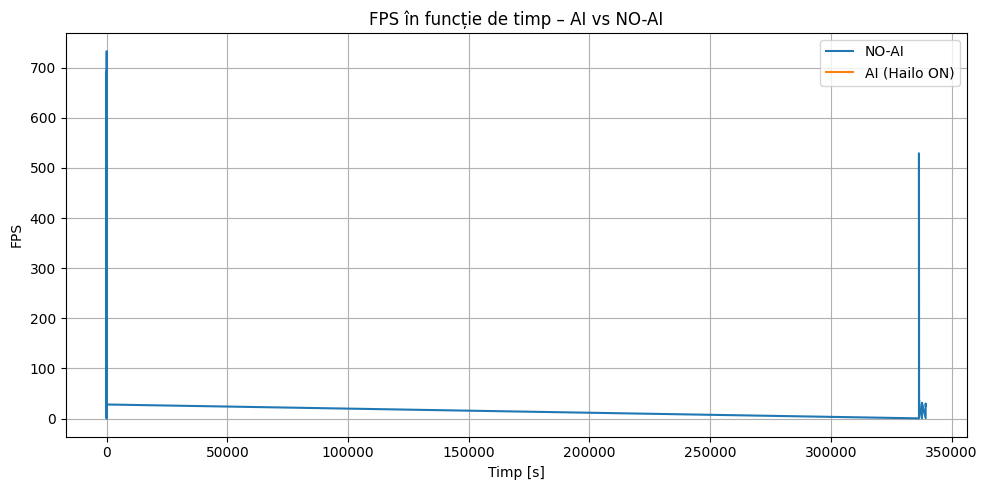

In [7]:
plt.figure()
plt.plot(df_noai["t_sec"], df_noai["fps"], label="NO-AI")
plt.plot(df_ai["t_sec"], df_ai["fps"], label="AI (Hailo ON)")
plt.xlabel("Timp [s]")
plt.ylabel("FPS")
plt.title("FPS în funcție de timp – AI vs NO-AI")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("compare_fps.png", dpi=150)
plt.show()


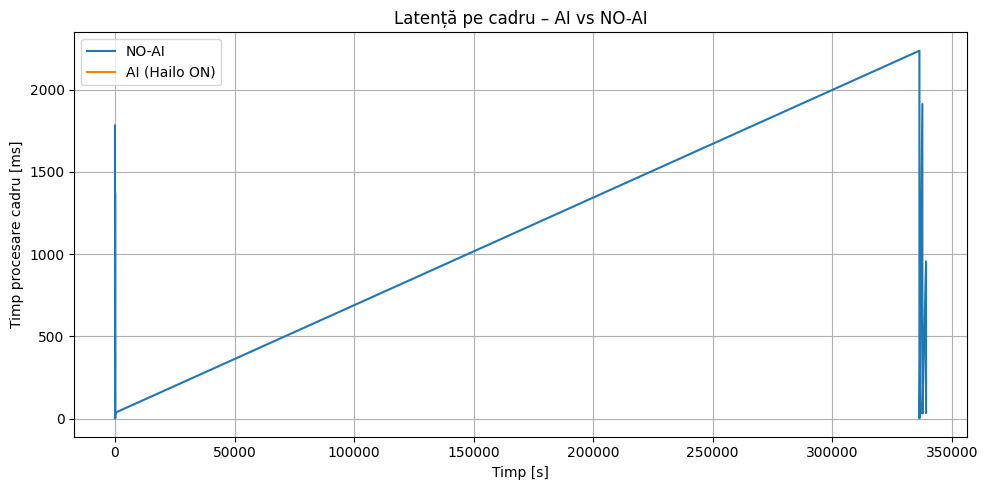

In [8]:
plt.figure()
plt.plot(df_noai["t_sec"], df_noai["frame_time_ms"], label="NO-AI")
plt.plot(df_ai["t_sec"], df_ai["frame_time_ms"], label="AI (Hailo ON)")
plt.xlabel("Timp [s]")
plt.ylabel("Timp procesare cadru [ms]")
plt.title("Latență pe cadru – AI vs NO-AI")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("compare_frame_time.png", dpi=150)
plt.show()
